In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
df = pd.read_json('../Data/combined.json')

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
catagory = ohe.fit_transform(df.drop(['SalePrice',
 'SqFtTotLiving',
 'SqFtDeck',
 'SqFtOpenPorch',
 'Area',
 'SqFtLot',
 'WfntFootage'],axis=1))

In [7]:
column_names = ohe.get_feature_names([ 'PropertyType',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'WfntLocation',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'TidelandShoreland',
 'Bedrooms',
 'BathFullCount',
 'FinBasementGrade'])

In [8]:
df_cat = pd.DataFrame(catagory.todense(), columns=column_names, index=df.index)
df_cat.head()

,PropertyType_3,PropertyType_11,LakeWashington_1,LakeWashington_2,LakeWashington_3,LakeWashington_4,LakeSammamish_1,LakeSammamish_2,LakeSammamish_3,LakeSammamish_4,...,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,FinBasementGrade_11,FinBasementGrade_12
1085621070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577910050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577910070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577910080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525059126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_cont = df[['SalePrice',
 'SqFtTotLiving',
 'SqFtDeck',
 'SqFtOpenPorch',
 'Area',
 'SqFtLot',
 'WfntFootage']]

In [10]:
df_cont

,SalePrice,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage
1085621070,543950,2744,0,56,62,4770,0
9577910050,609950,3265,0,30,27,7424,0
9577910070,629950,3341,0,49,27,8527,0
9577910080,644950,3265,0,30,27,6501,0
2525059126,541000,1030,0,210,91,13503,0
...,...,...,...,...,...,...,...
1625079011,2400000,1260,0,60,94,1644825,1330
945000570,1150000,2820,220,0,6,4650,0
9514050600,921000,2280,0,110,35,4197,0
809001865,890000,1820,0,70,12,4000,0


In [11]:
df_final = pd.concat([df_cont, df_cat.reindex(df_cont.index)], axis=1)

In [12]:
df_final

,SalePrice,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage,PropertyType_3,PropertyType_11,LakeWashington_1,...,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,FinBasementGrade_11,FinBasementGrade_12
1085621070,543950,2744,0,56,62,4770,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577910050,609950,3265,0,30,27,7424,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577910070,629950,3341,0,49,27,8527,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577910080,644950,3265,0,30,27,6501,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525059126,541000,1030,0,210,91,13503,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625079011,2400000,1260,0,60,94,1644825,1330,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
945000570,1150000,2820,220,0,6,4650,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9514050600,921000,2280,0,110,35,4197,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809001865,890000,1820,0,70,12,4000,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_final.columns

Index(['SalePrice', 'SqFtTotLiving', 'SqFtDeck', 'SqFtOpenPorch', 'Area',
       'SqFtLot', 'WfntFootage', 'PropertyType_3', 'PropertyType_11',
       'LakeWashington_1', 'LakeWashington_2', 'LakeWashington_3',
       'LakeWashington_4', 'LakeSammamish_1', 'LakeSammamish_2',
       'LakeSammamish_3', 'LakeSammamish_4', 'SmallLakeRiverCreek_2',
       'SmallLakeRiverCreek_3', 'SmallLakeRiverCreek_4', 'WfntLocation_1',
       'WfntLocation_3', 'WfntLocation_4', 'WfntLocation_5', 'WfntLocation_6',
       'WfntLocation_7', 'WfntLocation_8', 'WfntLocation_9', 'WfntBank_1',
       'WfntBank_2', 'WfntBank_3', 'WfntBank_4', 'WfntPoorQuality_1',
       'WfntRestrictedAccess_1', 'WfntRestrictedAccess_2',
       'WfntRestrictedAccess_3', 'TidelandShoreland_1', 'TidelandShoreland_2',
       'TidelandShoreland_3', 'Bedrooms_1', 'Bedrooms_2', 'Bedrooms_3',
       'Bedrooms_4', 'Bedrooms_5', 'Bedrooms_6', 'Bedrooms_7', 'Bedrooms_8',
       'Bedrooms_9', 'Bedrooms_10', 'Bedrooms_13', 'BathFullCount_1'

In [14]:
df['LakeWashington'].value_counts()

0    25308
1      227
2      172
3      119
4       77
Name: LakeWashington, dtype: int64

In [15]:
df['LakeSammamish'].value_counts()

0    25771
1       44
2       39
3       26
4       23
Name: LakeSammamish, dtype: int64

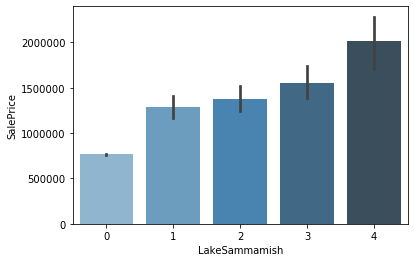

In [16]:
sns.barplot(x='LakeSammamish', y='SalePrice', data=df, palette='Blues_d')
plt.show()

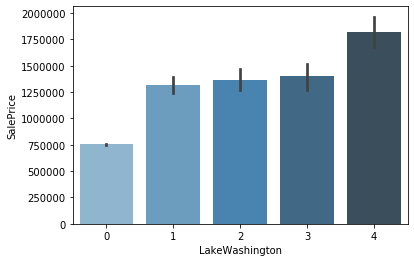

In [17]:
sns.barplot(x='LakeWashington', y='SalePrice', data=df, palette='Blues_d')
plt.show()

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


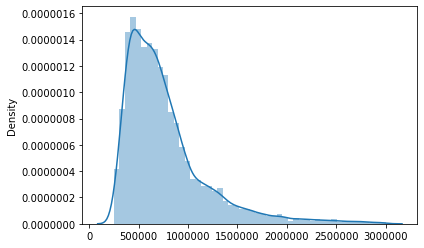

In [19]:
sp = np.array(df_final['SalePrice'])


sns.distplot(a=sp,)

In [35]:
no_porch = df_final.loc[df_final['SqFtOpenPorch'] == 0]
porch = df_final.loc[df_final['SqFtOpenPorch'] > 0]

In [38]:
porch['SalePrice'].mean()

852521.5150636019

In [39]:
no_porch['SalePrice'].mean()

677324.3884430176

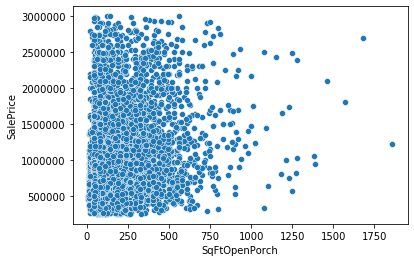

In [40]:
sns.scatterplot(data=porch, x='SqFtOpenPorch', y='SalePrice')

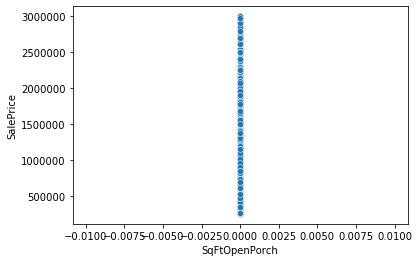

In [41]:
sns.scatterplot(data=no_porch, x='SqFtOpenPorch', y='SalePrice')

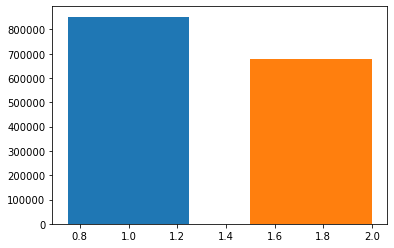

In [63]:
figure = plt.figure()
subplot = figure.add_subplot()

index = 1
width = .75

plt.bar(index, height=porch['SalePrice'].mean(), width=0.5)
plt.bar(index + width, height=no_porch['SalePrice'].mean(), width=0.5)
plt.
plt.show()

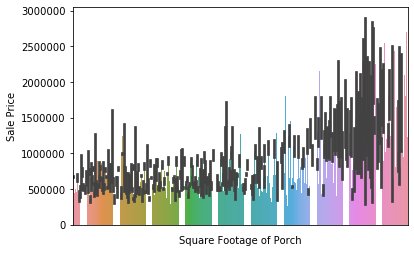

In [59]:
g1 = sns.barplot(x='SqFtOpenPorch', y='SalePrice', data=df_final)
g1.set(xticklabels=[])
g1.set(xlabel = 'Square Footage of Porch')
g1.set(ylabel = 'Sale Price')
g1.tick_params(bottom=False)
plt.show()

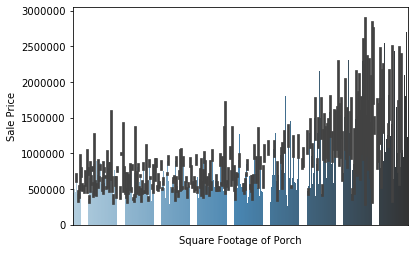

In [58]:
g1 = sns.barplot(x='SqFtOpenPorch', y='SalePrice', data=porch, palette='Blues_d')
g1.set(xticklabels=[])
g1.set(xlabel = 'Square Footage of Porch')
g1.set(ylabel = 'Sale Price')
g1.tick_params(bottom=False)
plt.show()

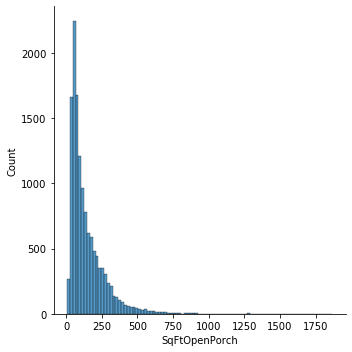

In [73]:
sns.displot(data=porch, x="SqFtOpenPorch", binwidth=20)

In [67]:
df['Porch_y_n'] = np.where(df['SqFtOpenPorch'].apply(lambda x: x > 0), 'Porch', 'No Porch')

In [69]:
Porch_sales = np.array(df.SalePrice.loc[df.Porch_y_n == 'Porch'])

In [70]:
no_porch_sales = np.array(df.SalePrice.loc[df.Porch_y_n == 'No Porch'])

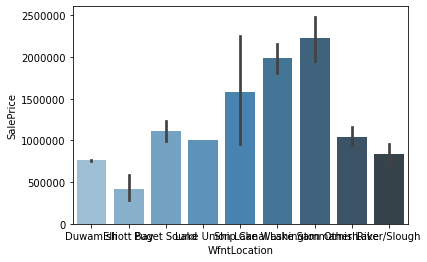

In [86]:
g2 = sns.barplot(x="WfntLocation", y="SalePrice", data=df, palette='Blues_d', )
g2.set_xticklabels(['Duwamish', 'Elliott Bay', 'Puget Sound', 'Lake Union', 'Ship Canal', 'Lake Washington',
                   'Lake Sammamish', 'Other Lake', 'River/Slough'])
plt.show()

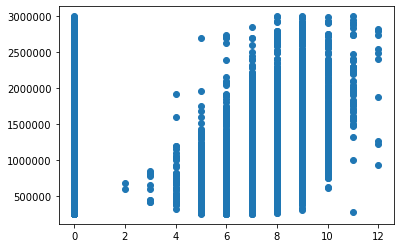

In [88]:
fig, ax = plt.subplots()
ax.scatter(df['FinBasementGrade'], df['SalePrice']);

In [107]:
df_new = df.loc[df["FinBasementGrade"] > 0]

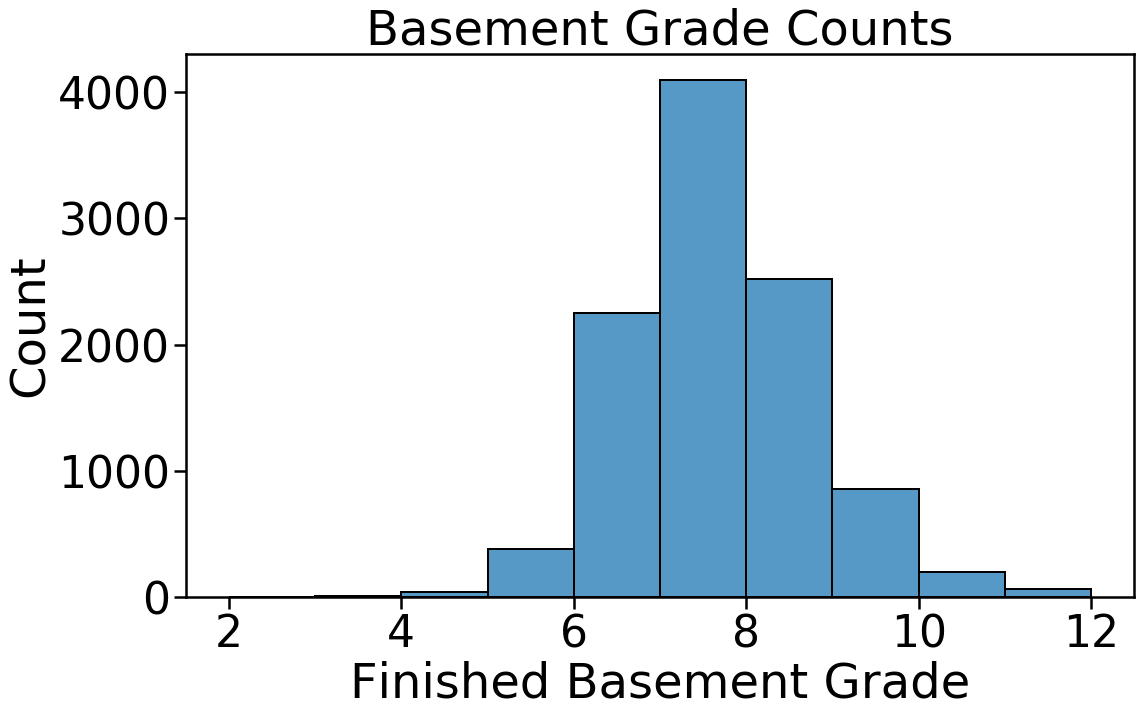

In [134]:
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.histplot(df_new['FinBasementGrade'], bins=10)
sns.set_context(context= 'poster', font_scale = 2)
ax.set(xlabel = 'Finished Basement Grade', ylabel = "Count", title='Basement Grade Counts')
plt.show()

fig.savefig('../../figures/basementdist.png',dpi=300, bbox_inches='tight')